# **SpaceX  Falcon 9 First Stage Landing Prediction**


## 1. Import Libraries and Load Data

Importing visualization libraries `seaborn` and `matplotlib`, along with `pandas` and `numpy`.

Then, I'll load the `dataset_part_2.csv` file, which was cleaned and merged in the previous notebooks.

In [17]:
#pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


In [18]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


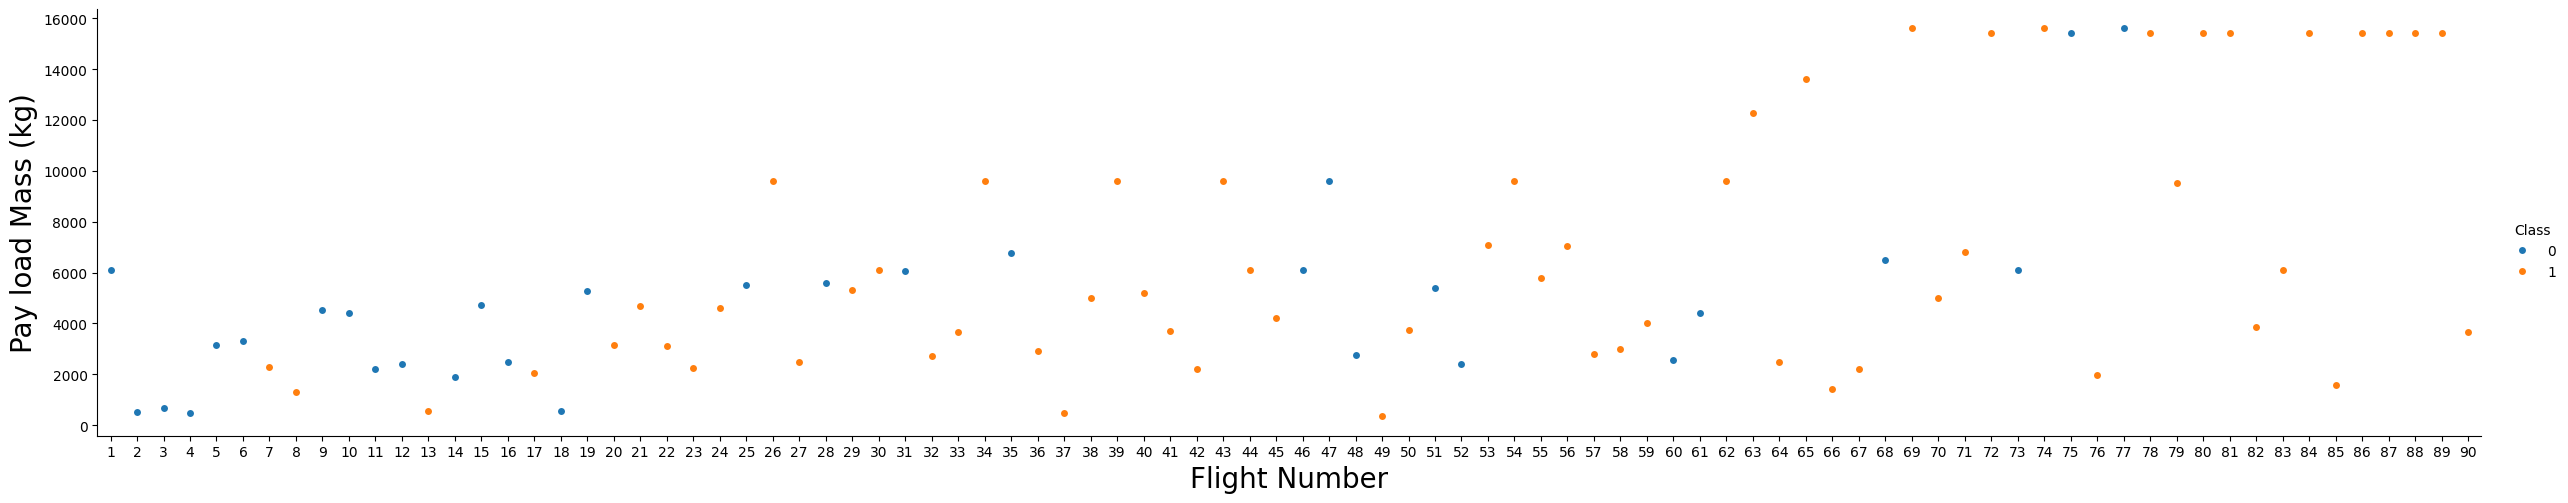

In [19]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

I see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


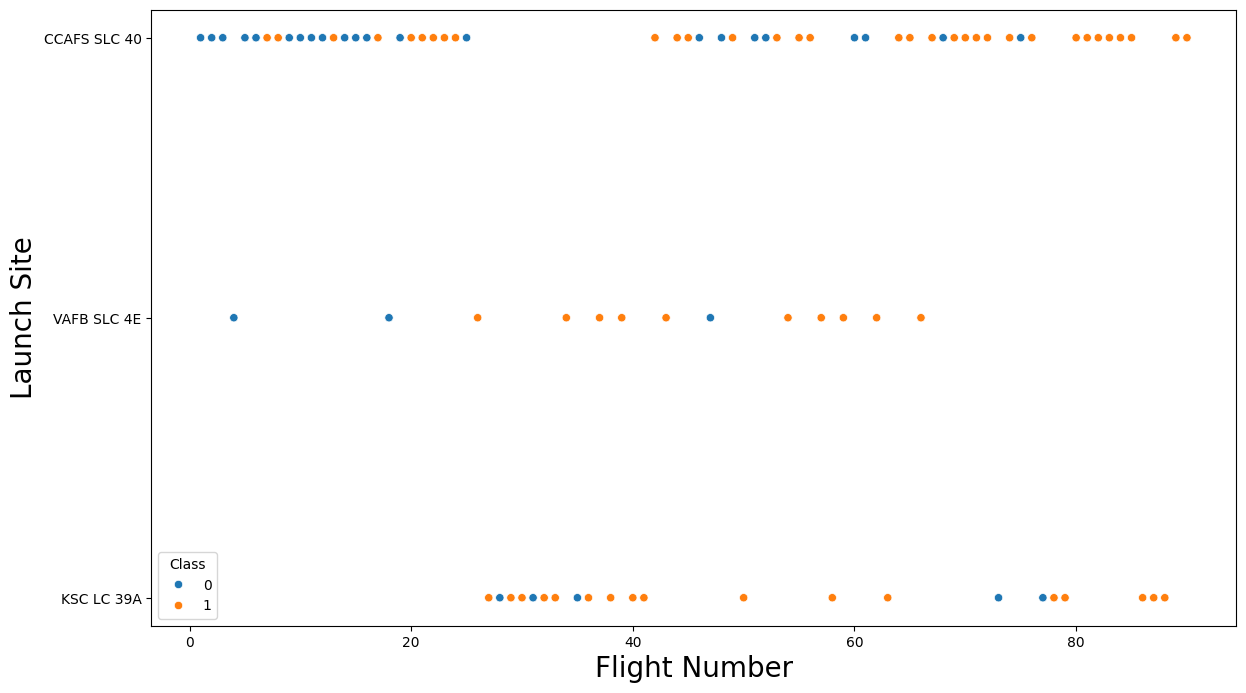

In [20]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(14,8))
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

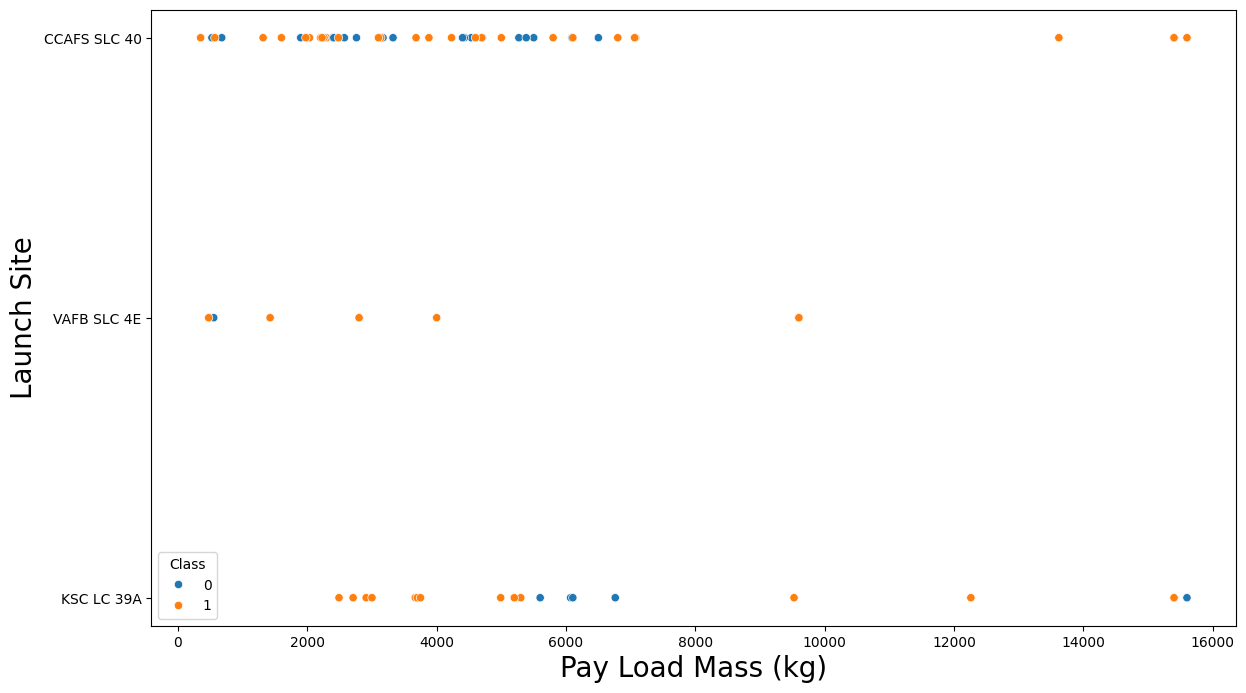

In [21]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(14,8))
sns.scatterplot(x="PayloadMass",y="LaunchSite", hue ="Class",data=df)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

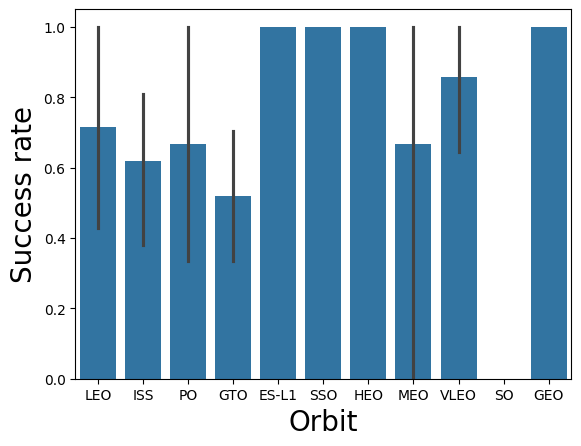

In [22]:
# HINT use groupby method on Orbit column and get the mean of Class column
sns.barplot(x="Orbit",y="Class",data=df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()

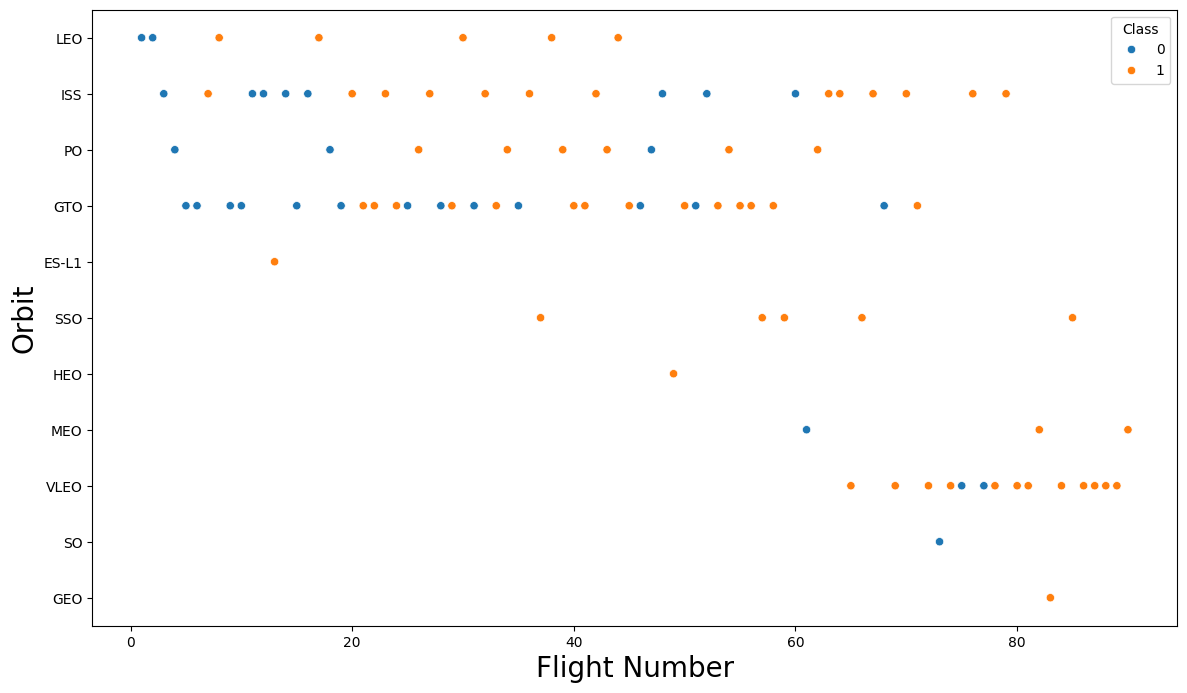

In [23]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(14,8))
sns.scatterplot(x="FlightNumber",y="Orbit",hue="Class",data = df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

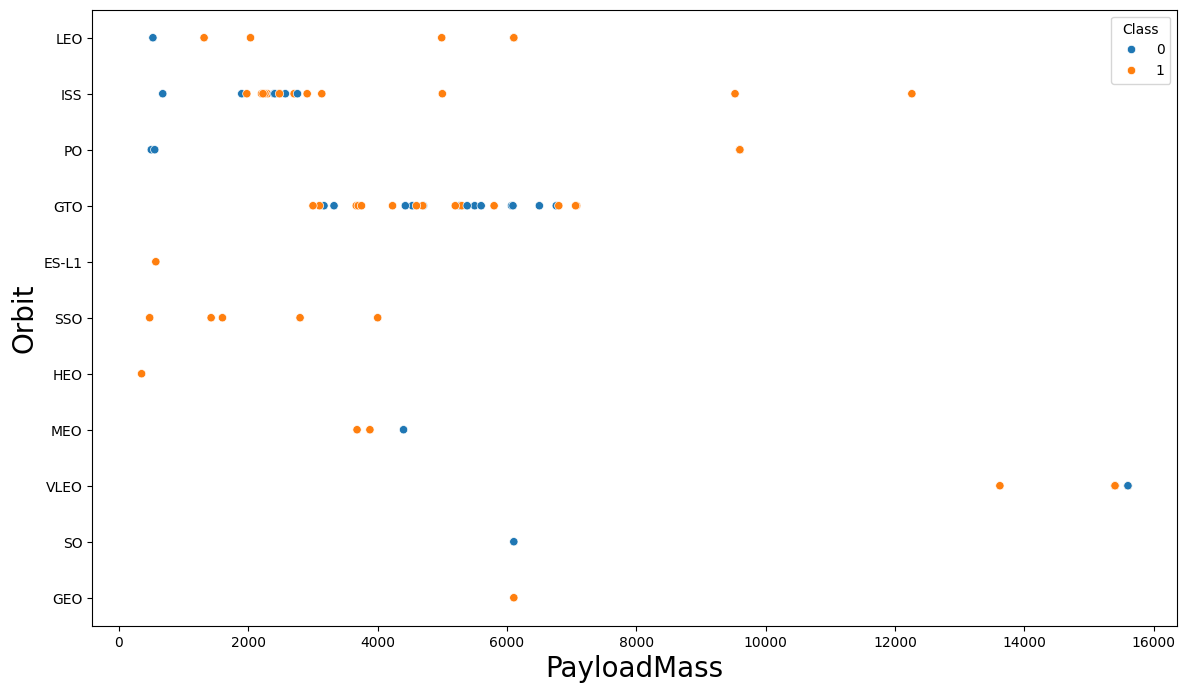

In [24]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(14,8))
sns.scatterplot(x="PayloadMass",y="Orbit",hue="Class",data = df)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [25]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


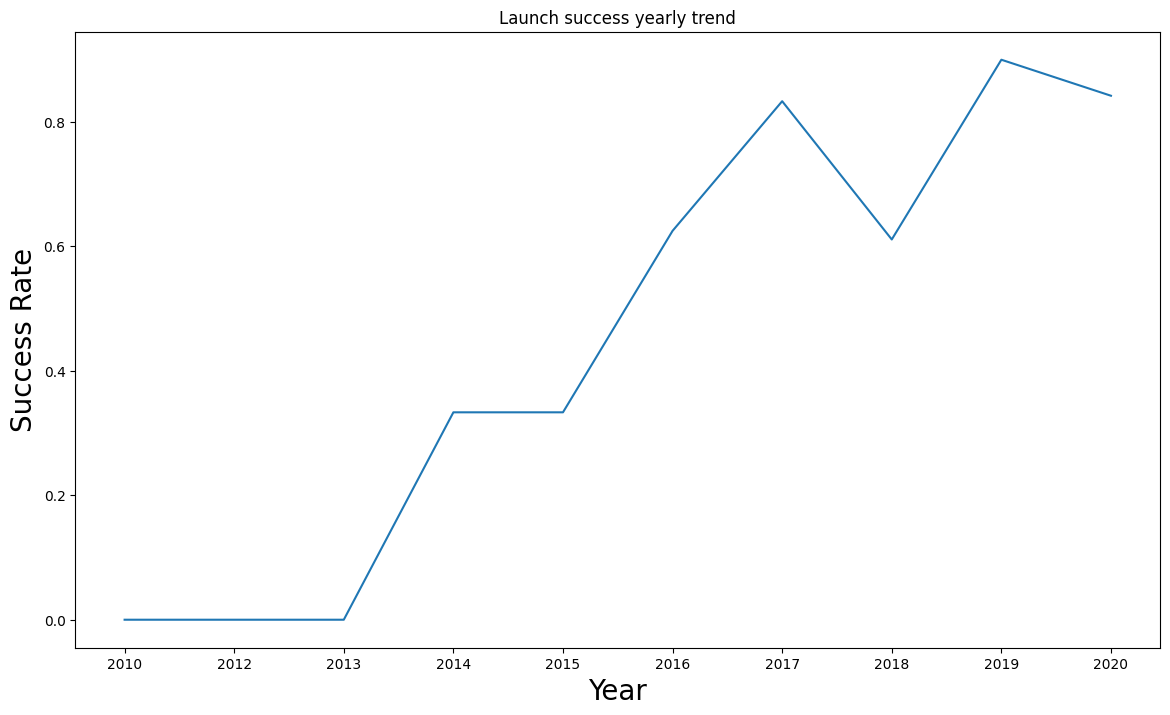

In [26]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['year']=Extract_year(df["Date"])
df_year_success=df.groupby("year",as_index=False)["Class"].mean()

plt.figure(figsize=(14,8))
sns.lineplot(data=df_year_success, x="year", y="Class" )
plt.xlabel("Year",fontsize=20)
plt.title('Launch success yearly trend')
plt.ylabel("Success Rate",fontsize=20)
plt.show()

## Features Engineering


In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [28]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = features

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['Orbit'])], axis=1)
features_one_hot.drop(['Orbit'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['LaunchSite'])], axis=1)
features_one_hot.drop(['LaunchSite'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['LandingPad'])], axis=1)
features_one_hot.drop(['LandingPad'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['Serial'])], axis=1)
features_one_hot.drop(['Serial'], axis = 1,inplace=True)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [29]:
# HINT: use astype function
features_one_hot = features_one_hot.astype(float)

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [30]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)